# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous le nom, le prénom et le numéro étudiant de chaque membre du binôme :
</div>

In [1]:
# Vu Hoang Thuy Duong - 21110221 SCFO

# TME 07Y - Variables continues

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1 - Loi normale

<div class="alert alert-block alert-warning">
La loi normale (de paramètres $\mu$ et $\sigma^2$) est la loi de la
    variable aléatoire $X$ réelle ($\mathcal{X} = \mathbb{R}$) telle que
    $$
    f(x) = \frac1{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x - \mu)^2}{2
    \sigma^2}\right).
    $$
    On note alors
    $$
    X \sim \mathcal{N}(\mu, \sigma^2).
    $$
</div>

<div class="alert alert-block alert-info">
Q1.1 - Écrire la définition de la fonction <code>loi_normale</code> qui étant donné une valeur <code>x</code> et les valeurs <code>mu</code> et <code>sigma2</code> (de paramètres $\mu$ et $\sigma^2$), renvoie la valeur de la fonction densité de la loi normale en <code>x</code> de paramètre $\pi$ et $\sigma^2$.
</div>

In [3]:
def loi_normale(x,mu,sigma2):
    return 1/np.sqrt(2*np.pi*sigma2) * np.exp(-(x - mu)**2 / 2*sigma2)

<div class="alert alert-block alert-warning">
    On peut utiliser la fonction <code>np.arange(xmin, xmax, delta)</code> pour générer un vecteur de valeurs comprises entre <code>xmin</code> inclus et <code>xmax</code> exclu avec un espacement égal à <code>delta</code> entre deux valeurs successives.
</div>

<div class="alert alert-block alert-info">
Exécuter le bloc ci-dessous pour obtenir les valeurs entre 0 et 1 espacées de 0.1.
</div>

In [4]:
np.arange(0, 1, .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

<div class="alert alert-block alert-info">
    Q1.2 - Dessiner une courbe qui donne l'allure de la fonction (densité) <code>loi_normale</code> entre -3 et 3 pour une loi normale centrée réduite.
</div>

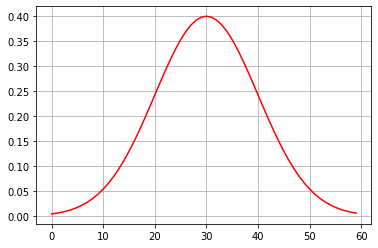

In [5]:
plt.plot(loi_normale(np.arange(-3,3,.1),0,1),color="red")
plt.grid()

<div class="alert alert-block alert-warning">
Pour effectuer un tirage aléatoire selon la loi $\mathcal{N}(\mu, \sigma^2)$, il n'est pas possible d'appliquer directement la <em>méthode de la fonction inverse</em> car il n'y a pas de forme explicite de la réciproque de la fonction de répartition de la loi normale.
    
On utilisera donc la fonction <code>np.random.normal(mu, sigma)</code> qui fera les tirages selon la loi normale centrée réduite pour nous.
</div>

<div class="alert alert-block alert-info">
Q1.3 - Écrire la définition de la fonction <code>tirage_normale</code> qui étant donné une valeur <code>n</code> et les paramètres <code>mu</code> et <code>sigma2</code>, renvoie un vecteur de <code>n</code> tirages selon la loi normale $\mathcal{N}(\mu, \sigma^2)$.
</div>

In [6]:
def tirage_normale(n,mu,sigma2):
    return [np.random.normal(mu,sigma2) for i in range(n)]

<div class="alert alert-block alert-info">
    Q1.4 - Tester la fonction <code>tirage_normale</code> en tirant un vecteur de taille 20 suivant une loi normale centrée réduite.
</div>

In [7]:
tirage_normale(20,0,1)

[-0.9606098060706859,
 -0.33767799073927557,
 -0.529097989407922,
 -1.3387582985838404,
 0.9492159942798601,
 1.0004449333848215,
 1.4176525705919052,
 -1.6067619119583332,
 0.25016861317566097,
 0.7397143428318231,
 -1.2644305461268206,
 -2.018976646588643,
 1.3537029565342307,
 -0.08400823230130952,
 1.8933846360374758,
 0.4574382824504042,
 0.2130276937229713,
 0.6321831567669893,
 -2.070920931430812,
 0.4167591299180629]

<div class="alert alert-block alert-warning">
    La fonction <code>plt.hist(data, bins = n)</code> permet de tracer l'histogramme des données <code>data</code> passées en entrée, en discrétisant l'intervalle d'entrée en <code>n</code> segments.
</div>

<div class="alert alert-block alert-info">
Q1.5 - Dessiner un histogramme à partir de 1000 tirages selon la loi normale centrée réduite.
</div>

Text(0.5, 1.0, '1000 tirages selon la loi normale centrée réduite, 50 segments')

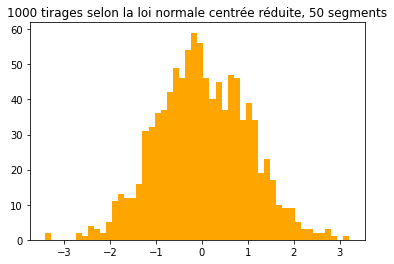

In [8]:
plt.hist(tirage_normale(1000,0,1),bins=50,color="orange")
plt.title("1000 tirages selon la loi normale centrée réduite, 50 segments")

<div class="alert alert-block alert-info">
Q1.6 - Quel rapport voyez-vous entre le graphe de la question 1.2 et celui de la question 1.5 ?
</div>

In [9]:
# Les 2 graphes de la question 1.2 et celui de la question 1.5 prennent presque le même allure

## 2 - Vraisemblance et loi normale

<div class="alert alert-block alert-warning">
La loi normale peut servir (entre autres) à caractériser le poids d'une population d'individus.
</div>

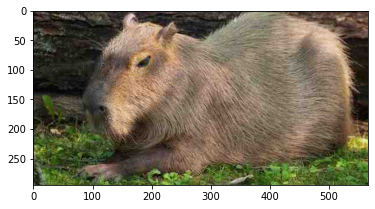

In [10]:
import matplotlib.image as mpimg
img = mpimg.imread('capybara.jpg')
_ = plt.imshow(img)

<div class="alert alert-block alert-info">
    Exécuter le bloc ci-dessous pour définir la variable <code>poids</code> contenant un vecteur d'observations du poids (en kg) d'une population de 200 capybaras adultes.
</div>

In [11]:
poids = np.array([47.73, 44.27, 72.04, 54.81, 48.33, 63.87, 52.45, 48.89, 59.13,
                  59.57, 47.46, 67.6 , 45.47, 54.93, 60.26, 58.58, 65.26, 72.72,
                  55.92, 62.29, 64.94, 55.11, 45.47, 50.15, 51.73, 55.63, 62.92,
                  50.37, 58.08, 52.7 , 62.91, 53.89, 42.4 , 53.83, 47.57, 53.11,
                  47.14, 47.54, 54.09, 53.27, 43.88, 58.77, 58.56, 56.37, 47.48,
                  55.15, 57.25, 62.28, 51.36, 56.06, 50.29, 46.83, 48.23, 44.4 ,
                  65.58, 50.88, 44.71, 61.1 , 56.48, 43.42, 65.31, 41.12, 57.54,
                  48.63, 55.76, 39.97, 54.37, 56.63, 43.79, 47.92, 52.87, 55.8 ,
                  56.71, 44.9 , 32.03, 36.98, 59.07, 49.55, 67.56, 35.92, 77.58,
                  56.73, 65.5 , 49.45, 45.54, 62.15, 61.07, 52.94, 58.19, 62.1 ,
                  51.88, 49.14, 50.52, 73.54, 48.64, 34.26, 58.71, 29.88, 57.21,
                  56.49, 51.31, 64.64, 72.72, 66.51, 50.09, 65.52, 72.96, 74.34,
                  66.2 , 66.01, 49.72, 67.76, 58.41, 73.89, 54.56, 66.61, 38.53,
                  52.24, 57.91, 66.  , 58.66, 66.31, 72.16, 64.96, 68.38, 83.78,
                  67.41, 70.63, 92.14, 67.74, 45.59, 60.28, 76.06, 46.57, 54.42,
                  83.62, 72.63, 66.08, 43.65, 58.11, 58.23, 60.74, 78.93, 54.82,
                  53.61, 54.48, 60.  , 57.56, 64.05, 67.56, 75.19, 68.9 , 44.51,
                  69.  , 85.97, 63.2 , 54.11, 84.58, 55.64, 41.57, 90.58, 90.85,
                  28.25, 55.88, 80.55, 73.76, 57.51, 50.14, 70.8 , 52.76, 73.08,
                  63.55, 53.18, 69.06, 76.14, 31.17, 81.32, 44.4 , 52.67, 74.91,
                  71.99, 55.86, 58.77, 74.57, 80.36, 72.81, 52.36, 53.05, 60.24,
                  84.62, 68.01, 58.63, 58.  , 60.85, 55.47, 57.49, 55.4 , 51.24,
                  46.68, 63.07])

<div class="alert alert-block alert-info">
Q2.1 - Dessiner un histogramme de ces observations.
</div>

Text(0.5, 1.0, 'Histogramme de la variable poids défini précédemment')

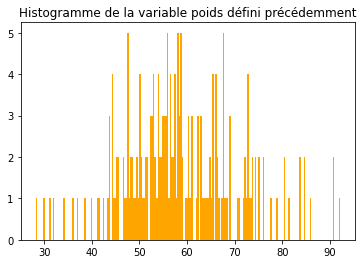

In [12]:
plt.hist(poids,bins=200,color="orange")
# print(len(plt.hist(poids,bins=200,color="orange")[0]))
plt.title("Histogramme de la variable poids défini précédemment")

<div class="alert alert-block alert-info">
Q2.2 - Écrire une fonction <code>log_vraisemblance</code> qui, étant donné n'importe quel vecteur d'observations <code>obs</code> et n'importe quelle densité de probabilité <code>f</code> (ne dépendant que de la variable $x$), renvoie le logarithme de la vraisemblance de ces observations.
</div>

In [13]:
import scipy.stats
def log_vraisemblance(obs,f,mu,sigma2):
    return np.log(scipy.stats.norm.pdf(obs,mu,sigma2)).sum()

<div class="alert alert-block alert-info">
    Q2.3 - Calculer la vraisemblance que les observations <code>poids</code> des capybaras aient été générées par une loi normale $\mathcal{N}(50, 8^2)$.
</div>

In [14]:
log_vraisemblance(poids,loi_normale,50,8**2)

### I can't find the result expected

-1020.7094326512479

<div class="alert alert-block alert-warning">
    Vous devriez trouver <code>-928.9630126331516</code>
</div>

<div class="alert alert-block alert-info">
Q2.4 - Parmi les lois suivantes, déterminer celle qui a le plus vraisemblablement généré les observations <code>poids</code> des capybaras :
<ol>
    <li>$\mathcal{N}(50, 8^2)$</li>
    <li>$\mathcal{N}(50, 10^2)$</li>
    <li>$\mathcal{N}(60, 8^2)$</li>
    <li>$\mathcal{N}(60, 10^2)$</li>
</ol>
</div>

In [15]:
print(log_vraisemblance(poids,loi_normale,50,8**2))
print(log_vraisemblance(poids,loi_normale,50,10**2))
print(log_vraisemblance(poids,loi_normale,60,8**2))
print(log_vraisemblance(poids,loi_normale,60,10**2))

-1020.7094326512479
-1106.9291806235528
-1019.0364590184354
-1106.2439306235528


<div class="alert alert-block alert-warning">
    À présent, nous allons regarder l'évolution de la vraisemblance en fonction du paramètre $\mu$ (et en fixant $\sigma^2$ à 10).
</div>

<div class="alert alert-block alert-info">
Q2.5 - Dessiner la courbe de la vraisemblance des poids des capybaras en fonction de $\mu$ (et en fixant $\sigma^2$ à 10) pour $\mu$ compris entre <code>np.min(poids)</code> et <code>np.max(poids)</code>.
</div>

58.436266266266266

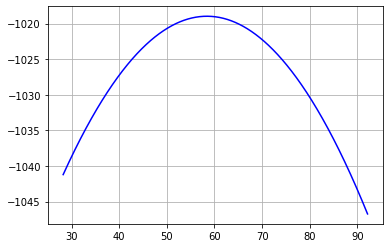

In [16]:
x = np.linspace(np.min(poids), np.max(poids), 1000, endpoint=True)

y = []
for i in x:
    y.append(np.log(scipy.stats.norm.pdf(poids,i,8**2)).sum())

plt.plot(x,y,color="blue")
plt.grid()

y_min = y.index(max(y))
x[y_min]

<div class="alert alert-block alert-info">
Q2.6 - Estimer sur la courbe la valeur de $\mu$ pour laquelle la vraisemblance est maximale. Dessiner la courbe de la vraisemblance des poids des capybaras en fonction de $\sigma^2$ (et en fixant $\mu$ à la valeur que vous avez estimée) pour $\sigma^2$ compris entre <code>8 ** 2</code> et <code>14 ** 2</code>.
</div>

/var/folders/dk/5xxlbv9n6xngmfm92w8343_40000gp/T/ipykernel_78878/3086476457.py:5: RuntimeWarning: divide by zero encountered in log
  y.append(np.log(scipy.stats.norm.pdf(poids,50,i)).sum())


-64.0

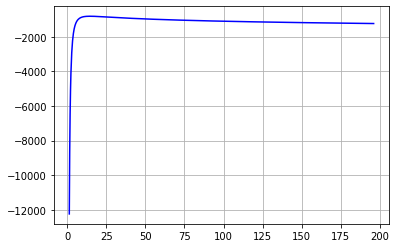

In [25]:
x = np.linspace(-8**2, 14**2, 1000, endpoint=True)

y = []
for i in x:
    y.append(np.log(scipy.stats.norm.pdf(poids,50,i)).sum())

plt.plot(x,y,color="blue")
plt.grid()

y_min = y.index(max(y))
x[y_min]

<div class="alert alert-block alert-info">
Q2.7 - À combien estimez-vous la valeur de $\sigma^2$ pour laquelle la vraisemblance est maximale ? Comment pourrait-on automatiquement estimer les deux paramètres $\mu$ et $\sigma^2$ ?
</div>

## 3 - Pour aller plus loin : mélange de gaussiennes

<div class="alert alert-block alert-warning">
En fait, les poids des capybaras sont constitués des poids des males et des poids des femelles. On étudie deux variables aléatoire : $P$ le poids et $S$ le sexe du capybara. Sachant $S = male$, $P$ suit une loi normale de paramètres $\mu_m$ et $\sigma_m^2$. Sachant $S = femelle$, $P$ suit une loi normale de paramètres $\mu_f$ et $\sigma_f^2$.
On suppose que $P(S = male) = P(S = femelle) = 0.5$.
</div>

<div class="alert alert-block alert-info">
    Q3.1 - Écrire la fonction <code>melange_gaussien</code> qui étant donné une valeur <code>x</code> et les paramètres <code>mu_m</code>, <code>sigma2_m</code>, <code>mu_f</code>, <code>sigma2_f</code> renvoie la valeur :
$$
    f(x) = 0.5 \frac1{\sigma_m\sqrt{2\pi}}\exp\left(-\frac{(x - \mu_m^2}{2
    \sigma_m^2}\right)
    + 0.5 \frac1{\sigma_f \sqrt{2\pi}}\exp\left(-\frac{(x - \mu_f^2)}{2
    \sigma_f^2}\right).
    $$
</div>

In [18]:
def melange_gaussien(x,mu_m,sigma2_m,mu_f,sigma2_f):
    return .5*loi_normale(x,mu_m,sigma2_m) + .5*loi_normale(x,mu_f,sigma2_f)

<div class="alert alert-block alert-info">
Q3.2 - Estimer la valeur de $\mu_m$ par maximum de vraisemblance en supposant que $\mu_f = 60$, $\sigma_f^2 = 12^2$, $\sigma_m^2 = 8^2$.
</div>

58.415841584158414

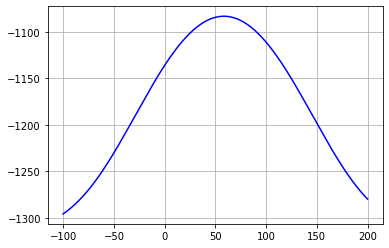

In [22]:
x = np.linspace(-100, 200, 10000, endpoint=True)

y = []
for i in x:
    y.append(np.log(.5*scipy.stats.norm.pdf(poids,i,8**2) + .5*scipy.stats.norm.pdf(poids,60,12**2)).sum())

plt.plot(x,y,color="blue")
plt.grid()

y_min = y.index(max(y))
x[y_min]

<div class="alert alert-block alert-info">
Q3.3 - Comment pourrait-on estimer automatiquement les paramètres $\mu_f, \sigma_f^2, \mu_m, \sigma_m^2$ ?
</div>

---